# Decision trees #

During the course, the scikit-learn (sklearn) package will be used to build decision trees based on data, test the trees and use them for classification. 

In [25]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
iris = load_iris()  #read an example dataset

Creating a tree object.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
mytree1 = tree.DecisionTreeClassifier()

Training a decision tree classifier on the basis of training data.

In [27]:
mytree1.fit(iris.data, iris.target)

DecisionTreeClassifier()

It is possible to read the configuration parameters of the tree using  the `get_params` method.

In [28]:
mytree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Classifying an example feature vector.

In [29]:
result_class = mytree1.predict([[2,3,4,5]])
print(iris.target_names[result_class])

['versicolor']


It is also possible to get the class probablities for a given example. 

In [30]:
mytree1.predict_proba([[2,3,4,5]])

array([[0., 1., 0.]])

# Tree structure 

Function `plot_tree` lets draw the trained tree.

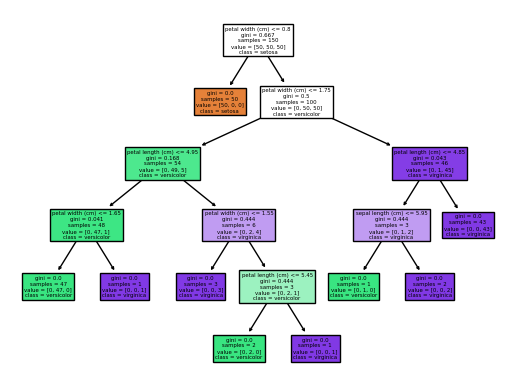

In [31]:
tree.plot_tree(mytree1,filled=True, feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()

The tree structure is saved in the `tree_` attribute. You may find information on the number of nodes there and tables containing:

* for each internal node: the indices if the left and the right descendant nodes, the index of the attribute selected for the decision rule in that node and a threshold value for that attribute,

* for each leaf: irrelevant values.

Analyze the structure of your tree (`mytree1`).

In [32]:
print("Number of nodes: ", mytree1.tree_.node_count)
print("Indexes of left children nodes:", mytree1.tree_.children_left)
print("Indexes of right children nodes:",mytree1.tree_.children_right)
print("Selected attributes:", mytree1.tree_.feature)
print("Threshold values:", mytree1.tree_.threshold)

Number of nodes:  17
Indexes of left children nodes: [ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]
Indexes of right children nodes: [ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]
Selected attributes: [ 3 -2  3  2  3 -2 -2  3 -2  2 -2 -2  2  0 -2 -2 -2]
Threshold values: [ 0.80000001 -2.          1.75        4.95000005  1.65000004 -2.
 -2.          1.55000001 -2.          5.45000005 -2.         -2.
  4.85000014  5.95000005 -2.         -2.         -2.        ]


**Excercise 1: (1 pt)**

Using the information about the tree structure contained in the attribute `tree_`, list the indices of all leaves of the constructed tree. 

In [33]:
import numpy as np

In [34]:
leaf_indices = np.where((mytree1.tree_.children_left == -1) & (mytree1.tree_.children_right == -1))[0]
print(leaf_indices)

[ 1  5  6  8 10 11 14 15 16]


# Testing a decision tree

**On the basis of a separate set of data** 

The data set is divided into training and testing data (`train_test_split`). The `score` method returns the classification accuracy. Using the `confusion_matrix` function you can find out exactly what the classification results are depending on the class. This function returns the a matrix whose element (i, j) contains the number of examples of the i-th class classified to the j-th class. 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #, accuracy_score
data_train, data_test, target_train, target_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
mytree1.fit(data_train, target_train)
print(mytree1.score(data_test,target_test), " of the examples have been correctly classified.")
confusion_matrix(target_test, mytree1.predict(data_test))

0.95  of the examples have been correctly classified.


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  2, 19]], dtype=int64)

**During the cross-validation procedure** 

The data set is divided into k subsets. Training and testing is repeated k times. In each iteration, 1 of the k subsets is used for testing and all others for training (k-fold cross-validation). The results are averaged (`cross_val_score`). 

In [36]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(mytree1, iris.data, iris.target, cv=5)

We obtain the test results from individual validation runs as well as the averaged result with the 95% confidence interval. The real result is in this range with a probability of 0.95. 

In [37]:
print("Classification accuracy for individual validation runs: ", results)
print("Averaged classification accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 2))

Classification accuracy for individual validation runs:  [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Averaged classification accuracy: 0.96 (+/- 0.07)


As a result of cross-validation, each example is included in the test set once. The prediction results for individual examples can be read using the `cross_val_predict` function. This function, like `cross_val_score`, does cross validation, but returns the results of classifying individual examples instead of the accuracy obtained in subsequent iterations. 

In [38]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(mytree1, iris.data, iris.target, cv=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Excercise 2 (1 pt):**

Provide the number and the indices of examples that were misclassified during the 10-fold cross-validation. 

In [39]:
y_pred = cross_val_predict(mytree1, iris.data, iris.target, cv=10)
misclassified = np.where(y_pred != iris.target)[0]
print("Indices of the missclassified examples: ", misclassified)
print("Number of misclassified samples: ", len(misclassified))

Indices of the missclassified examples:  [ 70  77  83 106 119 129 138]
Number of misclassified samples:  7


**Excercise 3 (0.5 pt):**

Perform 10-fold cross-validation to test two trees differing in the attribute selection criterion used: information gain (`criterion = 'entropy'`) or Gini index (`criterion ='gini'`). Compare the quality of the classification in both cases. 

In [40]:
gini_tree = tree.DecisionTreeClassifier()
entropy_tree = tree.DecisionTreeClassifier(criterion='entropy')

In [41]:
gini_results = cross_val_score(gini_tree, iris.data, iris.target, cv=10)
entropy_results = cross_val_score(entropy_tree, iris.data, iris.target, cv=10)

In [42]:
print("Gini index criterion results:")
print("Classification accuracy for individual validation runs: ", gini_results)
print("Averaged classification accuracy: %0.2f (+/- %0.2f)" % (gini_results.mean(), gini_results.std() * 2))

Gini index criterion results:
Classification accuracy for individual validation runs:  [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Averaged classification accuracy: 0.96 (+/- 0.09)


In [43]:
print("Entropy information gain criterion results:")
print("Classification accuracy for individual validation runs: ", entropy_results)
print("Averaged classification accuracy: %0.2f (+/- %0.2f)" % (entropy_results.mean(), entropy_results.std() * 2))

Entropy information gain criterion results:
Classification accuracy for individual validation runs:  [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Averaged classification accuracy: 0.96 (+/- 0.09)


It seems the entropy information gain criterion for feature selection performs slightly worse.

# Limiting the size of the tree - stopping criterion

We can limit the size of the tree by setting the value of one of the following parameters:

`min_samples_split` - the minimum number of examples required to continue splitting data in the node

`min_samples_leaf` - the minimum number of examples allowed in a leaf

`max_leaf_nodes` - the maximum number of leaves

`max_depth` - the maximum depth of the tree 

**Excercise 4 (0.5 pt):**

View the description of `digits` dataset:

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Load this data set using the `load_digits()` function. 

For digits data train `mytree1` tree so that the minimum number of examples per leaf is 4. Then train `mytree2` tree so that it does not have more than 5 leaves. Compare the classification accuracy of both trees for the training set and for a separate test set.

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)
mytree1 = tree.DecisionTreeClassifier(min_samples_leaf=4)
mytree2 = tree.DecisionTreeClassifier(max_leaf_nodes=5)

In [99]:
mytree1.fit(data_train, target_train)
mytree2.fit(data_train, target_train)

DecisionTreeClassifier(max_leaf_nodes=5)

In [100]:
print("Tree with minimum 4 examples per leaf: ", mytree1.score(data_test, target_test))
print("Tree with maximum 5 leaves: ", mytree2.score(data_test, target_test))

Tree with minimum 4 examples per leaf:  0.837037037037037
Tree with maximum 5 leaves:  0.3888888888888889


Tree with maximum 5 leaves has a significantly worse score to that with minimum 4 examples per leaf.

**Excercise 5 (1.5 pt):**

Adjust the optimal value of the `max_leaf_nodes` coefficient for the `digits` data set. To do this, divide the `digits` set into two parts. Using the first subset, perform cross-validation multiple times for different values of the optimized parameter. Identify the optimal value, i.e. the one for which the mean error is the lowest (estimated in the cross-validation process). After finding the optimal value, train the tree for the found number of `max_leaf_nodes`. This time, use the entire first subset of data for training. Then test the constructed tree on the data from the second subset. Compare the obtained results with the results obtained before the optimization of the `max_leaf_nodes` parameter. 

The results of the whole procedure (not only the final ones) should be displayed.


In [71]:
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)
mytree = tree.DecisionTreeClassifier()
mytree.fit(data_train, target_train)
MAX_LEAF_NODES = 100

df = pd.DataFrame(columns=['max_leaf_nodes', 'score'])
for i in range(2,MAX_LEAF_NODES):
    optimized_tree = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    df.loc[len(df.index)] = [i, cross_val_score(optimized_tree, data_train, target_train, cv=10).mean()]

In [72]:
df.sort_values(by='score', ascending=False)

,max_leaf_nodes,score
75,77.0,0.810712
93,95.0,0.810712
92,94.0,0.804045
83,85.0,0.804032
53,55.0,0.802946
...,...,...
4,6.0,0.495605
3,5.0,0.430986
2,4.0,0.368614
1,3.0,0.282871


In [73]:
max_leaf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=75)
max_leaf_tree.fit(data_train, target_train)

DecisionTreeClassifier(max_leaf_nodes=75)

In [74]:
print(mytree.score(data_test, target_test))
print(max_leaf_tree.score(data_test, target_test))

0.8286985539488321
0.8120133481646273


**Excercise 6 (1.5 pt):**

Split the `digits` dataset into training and testing in a 2:1 ratio. Repeat training and testing many times using an increasing value of the `max_leaf_nodes` parameter. Draw a graph showing the dependence of the classification error on the size of the tree. Show this relationship on a single plot both for testing and training data. 

In [101]:
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=0)

In [102]:
from sklearn.metrics import mean_squared_error

In [103]:
df = pd.DataFrame(columns=['max_leaf_nodes', 'size', 'error'])
for i in range (2, 100):
    leaf_tree = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    leaf_tree.fit(data_train, target_train)
    y_pred = leaf_tree.predict(data_test)
    df.loc[len(df.index)] = [i, leaf_tree.tree_.node_count, mean_squared_error(target_test, y_pred)]

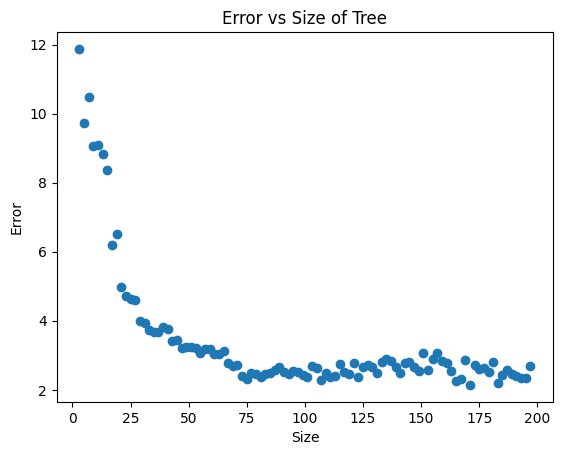

In [104]:
fig, ax = plt.subplots()
ax.scatter(x=df['size'], y=df['error'])
ax.set_xlabel('Size')
ax.set_ylabel('Error')
ax.set_title('Error vs Size of Tree')
plt.show()

# Random forests #

See the description of `RandomForestClassifier` class:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [48]:
from sklearn.ensemble import RandomForestClassifier

**Excercise 7 (1.5 pt)**

For the digits dataset, construct a random forest of 20 trees.

a) What is the classification error for the training set?

b) What is the classification error estimated in the cross-validation process?

c) Which digit (class) shows the highest calssification accuracy and which one shows the lowest accuracy?

d) What is the most common mistake (which number is confused the most often)? 

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
import numpy as np

In [8]:
# Load and split data
digits = datasets.load_digits()
X, y = datasets.load_digits(return_X_y=True)
data_train, data_test, target_train, target_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Train model
forest = RandomForestClassifier(n_estimators=20)
forest.fit(data_train, target_train)

RandomForestClassifier(n_estimators=20)

In [10]:
# Make predictions
y_pred = forest.predict(data_test)
y_pred_train = forest.predict(data_train)

In [11]:
# Basic errors
print("The training set classification error: ", mean_squared_error(target_train, y_pred_train))
print("The test set classification error: ", mean_squared_error(target_test, y_pred))
print("Cross validation classification error", cross_val_score(forest, data_train, target_train,                                                                cv=5, scoring='neg_mean_squared_error').mean())

The training set classification error:  0.0
The test set classification error:  0.7981481481481482
Cross validation classification error -0.8538702333523052


In [12]:
# Get per-class accuracy
class_report = classification_report(target_test, y_pred, output_dict=True)
class_accuracies = {str(i): class_report[str(i)]['precision'] for i in range(10)}

In [13]:
# Find highest and lowest accuracy classes
highest_acc_class = max(class_accuracies.items(), key=lambda x: x[1])
lowest_acc_class = min(class_accuracies.items(), key=lambda x: x[1])

In [14]:
print("\nPer-class accuracies:")
for digit, accuracy in class_accuracies.items():
    print(f"Digit {digit}: {accuracy:.3f}")
print(f"\nHighest accuracy: Digit {highest_acc_class[0]} ({highest_acc_class[1]:.3f})")
print(f"Lowest accuracy: Digit {lowest_acc_class[0]} ({lowest_acc_class[1]:.3f})")


Per-class accuracies:
Digit 0: 0.978
Digit 1: 0.945
Digit 2: 0.981
Digit 3: 0.881
Digit 4: 0.959
Digit 5: 0.946
Digit 6: 0.967
Digit 7: 0.962
Digit 8: 1.000
Digit 9: 0.943

Highest accuracy: Digit 8 (1.000)
Lowest accuracy: Digit 3 (0.881)


In [15]:
# Analyze confusion matrix
conf_matrix = confusion_matrix(target_test, y_pred)
mistakes = np.zeros((10, 10))

In [16]:
# Calculate mistake frequencies
for true_digit in range(10):
    for predicted_digit in range(10):
        if true_digit != predicted_digit:
            mistakes[true_digit, predicted_digit] = conf_matrix[true_digit, predicted_digit]

In [17]:
# Find most common mistake
max_mistake_idx = np.unravel_index(np.argmax(mistakes), mistakes.shape)
print(f"\nMost common confusion: Digit {max_mistake_idx[0]} predicted as {max_mistake_idx[1]}")
print(f"Number of occurrences: {int(mistakes[max_mistake_idx])}")


Most common confusion: Digit 9 predicted as 3
Number of occurrences: 5


**Excercise 8 (1 pt)**

For each class, provide the classification accuracy, i.e. the ratio of correctly classified examples of a given class to all examples of that class. It is one of the classifier quality parameters and it is called recall. You can use the `recall_score` function or determine the appropriate values yourself using the confusion matrix. Find the recall values in two ways. 

In [25]:
from sklearn.metrics import recall_score

In [26]:
# Recall values the easy way
classification_accuracy = np.zeros(10)
for pos_label in range(10):
    recall = recall_score(target_test, y_pred, labels=[pos_label], average='macro')
    print(f"For digit class: {pos_label} recall score is: "
          f"{round(recall, 2)}")


For digit class: 0 recall score is: 1.0
For digit class: 1 recall score is: 1.0
For digit class: 2 recall score is: 0.96
For digit class: 3 recall score is: 0.96
For digit class: 4 recall score is: 0.98
For digit class: 5 recall score is: 0.93
For digit class: 6 recall score is: 0.98
For digit class: 7 recall score is: 0.96
For digit class: 8 recall score is: 0.92
For digit class: 9 recall score is: 0.88


In [27]:
true_positives = np.zeros(10)
false_negatives = np.zeros(10)
for true_digit in range(10):
    for predicted_digit in range(10):
        if true_digit == predicted_digit:
            true_positives[true_digit] = conf_matrix[true_digit, predicted_digit]
        else: 
            false_negatives[true_digit] += conf_matrix[true_digit, predicted_digit]
for i in range(10):
    recall = (true_positives[i]/(true_positives[i]+false_negatives[i]))
    print(f"Recall score for digit {i} classification task: {round(recall, 2)}")
    

Recall score for digit 0 classification task: 1.0
Recall score for digit 1 classification task: 1.0
Recall score for digit 2 classification task: 0.96
Recall score for digit 3 classification task: 0.96
Recall score for digit 4 classification task: 0.98
Recall score for digit 5 classification task: 0.93
Recall score for digit 6 classification task: 0.98
Recall score for digit 7 classification task: 0.96
Recall score for digit 8 classification task: 0.92
Recall score for digit 9 classification task: 0.88


**Excercise 9 (1.5 pt)**

Plot a graph showing the dependence of the random forest classification error on the number of trees in the forest. Estimate the classification error in the 5-fold cross-validation. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [37]:
# Initialize empty lists to store results
n_estimators_range = range(1, 21)
errors = []

# Calculate error for different numbers of trees
for n_estimator in n_estimators_range:
    forest = RandomForestClassifier(n_estimators=n_estimator, random_state=42)
    # We use negative MSE, so we need to negate it back to get actual MSE
    scores = -cross_val_score(forest, data_train, target_train,
                              cv=5, scoring='neg_mean_squared_error')
    # Take the mean of cross-validation scores
    mean_score = scores.mean()
    errors.append(mean_score)


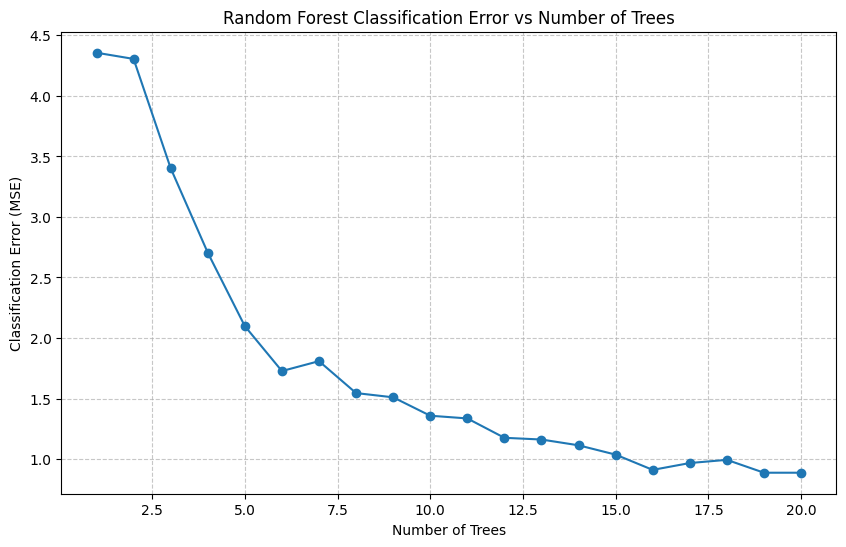

In [38]:
# Create DataFrame after collecting all data
df = pd.DataFrame({
    'estimators_number': list(n_estimators_range),
    'error': errors
})

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['estimators_number'], df['error'], marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error (MSE)')
plt.title('Random Forest Classification Error vs Number of Trees')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()